In [1]:
import sys
sys.path.append("../")

In [2]:
import pandas as pd 
import numpy as np
import os
import scanpy as sc
import torch

/var/folders/n0/lbm2yq4n3r1gp83zkf5s69j00000gn/T/ipykernel_74400/2819247731.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Test automatic tresholding of covariance tree

In [3]:
from echidna.eval import *

/Users/mingxuanzhang/anaconda3/envs/work/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
patient = 'R319'
PATH = "../../Data/echidna3/"
path = os.path.join(PATH, patient + "_tumors.h5ad")
print(path)

../../Data/echidna3/R319_tumors.h5ad


In [6]:
PARAM_PATH = "../../Data/echidna3/MT_params/"

In [7]:
c_on = pd.read_csv(os.path.join(PARAM_PATH, patient + "/c_on.csv"))
c_pre = pd.read_csv(os.path.join(PARAM_PATH, patient + "/c_pre.csv"))
eta = pd.read_csv(os.path.join(PARAM_PATH, patient + "/eta.csv"))

In [8]:
eta_tensor = torch.tensor(eta[eta.select_dtypes(include=[float, int]).columns].values.astype(float).T)
eta_tensor.shape

torch.Size([10, 22609])

Knee point:  7
Threshold:  0.48060788110599684


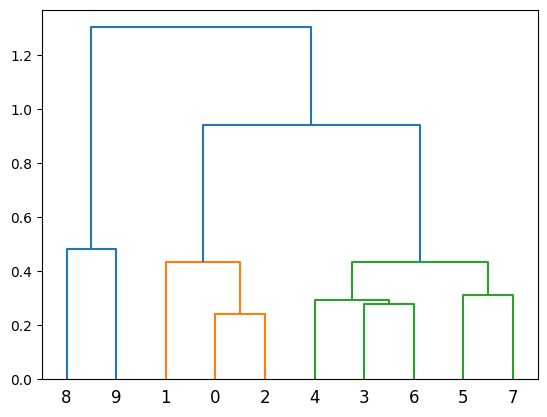

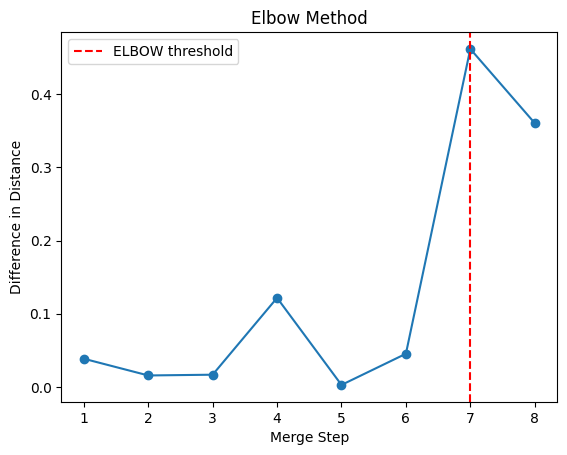

In [9]:
dn = eta_cov_tree_elbow_thresholding(eta_tensor, plot_elbow=True)

# Doesn't work well with very unbalanced trees

## Idea 1: Mesaure balance with node depth variance->Threshold based on perfectly balaced tree vs. perfectly imbalanced tree->if more than threshold use 2nd derivative ELBOW

In [49]:
patient = 'R310'
path = os.path.join(PATH, patient + "_tumors.h5ad")
print(path)

../../Data/echidna3/R310_tumors.h5ad


In [50]:
c_on = pd.read_csv(os.path.join(PARAM_PATH, patient + "/c_on.csv"))
c_pre = pd.read_csv(os.path.join(PARAM_PATH, patient + "/c_pre.csv"))
eta = pd.read_csv(os.path.join(PARAM_PATH, patient + "/eta.csv"))
eta_tensor = torch.tensor(eta[eta.select_dtypes(include=[float, int]).columns].values.astype(float).T)
eta_tensor.shape

torch.Size([11, 23648])

Knee point:  9
Threshold:  0.7516644219499679


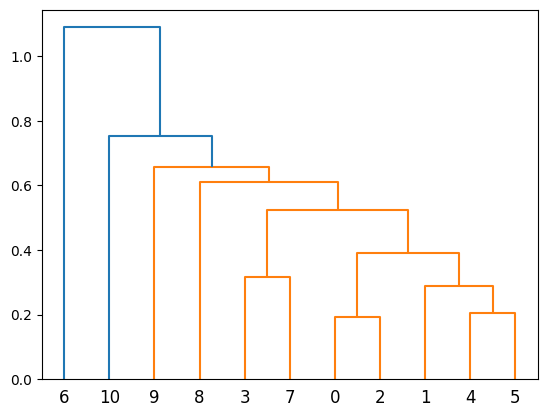

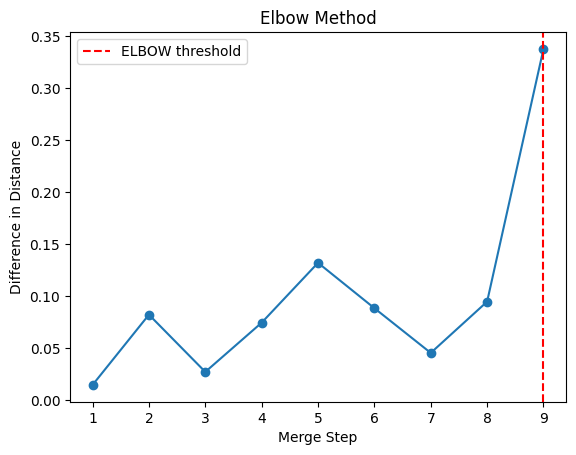

In [51]:
dn = eta_cov_tree_elbow_thresholding(eta_tensor, plot_elbow=True)

In [59]:
Z = linkage(torch.cov(eta_tensor).numpy(), method='average')

dendro = dendrogram(Z, no_plot=True)
leaves_list = dendro['leaves']

leaf_depths = {leaf: 0 for leaf in leaves_list}

for i, (idx1, idx2) in enumerate(Z[:, :2], len(Z) + 1):
    idx1, idx2 = int(idx1), int(idx2)
    if i not in leaves_list:
        leaf_depths[i] = max(leaf_depths[idx1], leaf_depths[idx2]) + 1

print("Node Depths:", leaf_depths)
print("Node Depth variance", np.var(list(leaf_depths.values())))

Node Depths: {6: 0, 10: 0, 9: 0, 8: 0, 3: 0, 7: 0, 0: 0, 2: 0, 1: 0, 4: 0, 5: 0, 11: 1, 12: 1, 13: 2, 14: 1, 15: 3, 16: 4, 17: 5, 18: 6, 19: 7, 20: 8}
Node Depth variance 6.535147392290249


In [60]:
patient = 'F01'
path = os.path.join(PATH, patient + "_tumors.h5ad")
print(path)

../../Data/echidna3/F01_tumors.h5ad


In [61]:
c_on = pd.read_csv(os.path.join(PARAM_PATH, patient + "/c_on.csv"))
c_pre = pd.read_csv(os.path.join(PARAM_PATH, patient + "/c_pre.csv"))
eta = pd.read_csv(os.path.join(PARAM_PATH, patient + "/eta.csv"))

In [62]:
eta_tensor = torch.tensor(eta[eta.select_dtypes(include=[float, int]).columns].values.astype(float).T)
eta_tensor.shape

torch.Size([10, 23926])

Knee point:  8
Threshold:  0.24412283807075108


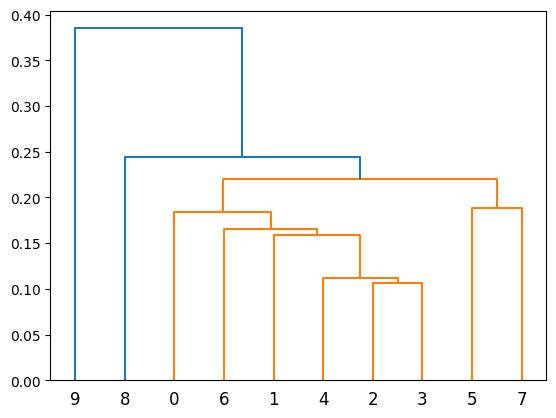

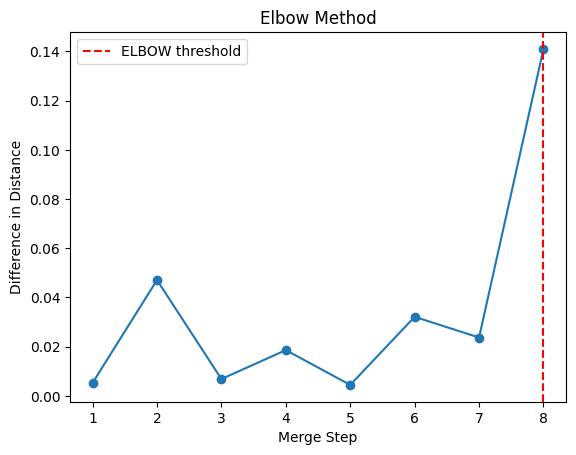

In [63]:
dn = eta_cov_tree_elbow_thresholding(eta_tensor, plot_elbow=True)

In [64]:
Z = linkage(torch.cov(eta_tensor).numpy(), method='average')

dendro = dendrogram(Z, no_plot=True)
leaves_list = dendro['leaves']

leaf_depths = {leaf: 0 for leaf in leaves_list}

for i, (idx1, idx2) in enumerate(Z[:, :2], len(Z) + 1):
    idx1, idx2 = int(idx1), int(idx2)
    if i not in leaves_list:
        leaf_depths[i] = max(leaf_depths[idx1], leaf_depths[idx2]) + 1

print("Node Depths:", leaf_depths)
print("Node Depth variance", np.var(list(leaf_depths.values())))

Node Depths: {9: 0, 8: 0, 0: 0, 6: 0, 1: 0, 4: 0, 2: 0, 3: 0, 5: 0, 7: 0, 10: 1, 11: 2, 12: 3, 13: 4, 14: 5, 15: 1, 16: 6, 17: 7, 18: 8}
Node Depth variance 6.997229916897507


In [65]:
patient = 'R319'
path = os.path.join(PATH, patient + "_tumors.h5ad")
print(path)

../../Data/echidna3/R319_tumors.h5ad


In [66]:
c_on = pd.read_csv(os.path.join(PARAM_PATH, patient + "/c_on.csv"))
c_pre = pd.read_csv(os.path.join(PARAM_PATH, patient + "/c_pre.csv"))
eta = pd.read_csv(os.path.join(PARAM_PATH, patient + "/eta.csv"))
eta_tensor = torch.tensor(eta[eta.select_dtypes(include=[float, int]).columns].values.astype(float).T)
eta_tensor.shape

torch.Size([10, 22609])

Knee point:  7
Threshold:  0.48060788110599684


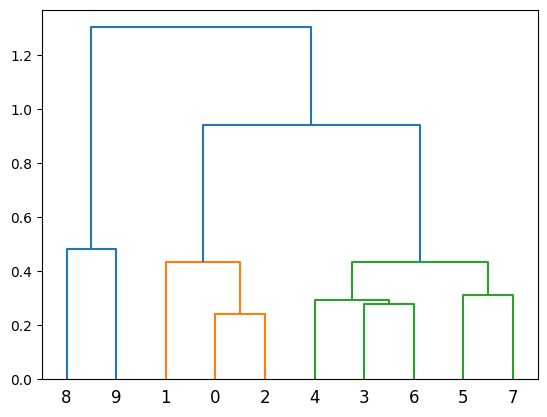

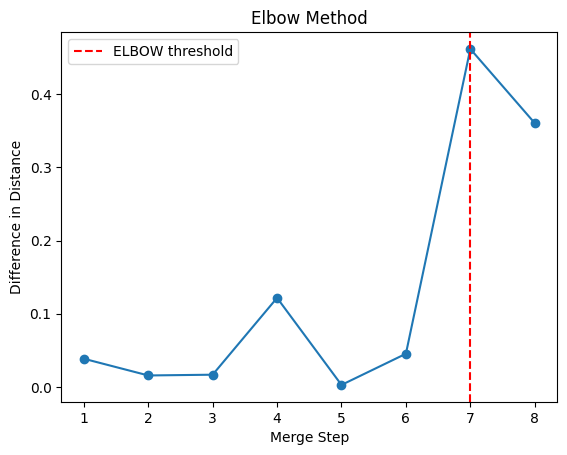

In [67]:
dn = eta_cov_tree_elbow_thresholding(eta_tensor, plot_elbow=True)

In [68]:
Z = linkage(torch.cov(eta_tensor).numpy(), method='average')

# Get the leaf depths for each leaf in the dendrogram
dendro = dendrogram(Z, no_plot=True)
leaves_list = dendro['leaves']

# Initialize leaf depths for each leaf
leaf_depths = {leaf: 0 for leaf in leaves_list}

for i, (idx1, idx2) in enumerate(Z[:, :2], len(Z) + 1):
    idx1, idx2 = int(idx1), int(idx2)
    if i not in leaves_list:
        leaf_depths[i] = max(leaf_depths[idx1], leaf_depths[idx2]) + 1

print("Node Depths:", leaf_depths)
print("Node Depth variance", np.var(list(leaf_depths.values())))

Node Depths: {8: 0, 9: 0, 1: 0, 0: 0, 2: 0, 4: 0, 3: 0, 6: 0, 5: 0, 7: 0, 10: 1, 11: 1, 12: 2, 13: 1, 14: 2, 15: 3, 16: 1, 17: 4, 18: 5}
Node Depth variance 2.1551246537396125


In [86]:
import math

# Perfectly balanced binary tree node depth variance
def calculate_depth(n):
    height = int(math.log2(n + 1))
    depths = [0] * (n + 1)
    for i in range(1, n + 1):
        depths[i] = height - int(math.log2(i))

    return depths

n_nodes = 11
node_depths = calculate_depth(n_nodes)

for i, depth in enumerate(node_depths):
    print(f"Node {i}: Depth {depth}")
var_balance = np.var(node_depths)
print("Node depth variance", np.var(node_depths))

Node 0: Depth 0
Node 1: Depth 3
Node 2: Depth 2
Node 3: Depth 2
Node 4: Depth 1
Node 5: Depth 1
Node 6: Depth 1
Node 7: Depth 1
Node 8: Depth 0
Node 9: Depth 0
Node 10: Depth 0
Node 11: Depth 0
Node depth variance 0.9097222222222223


In [87]:
# Perfectly imbalanced binary tree node depth variance
def calculate_depth(n):
    depths = [i for i in range(n)]
    return depths

n_nodes = 11
node_depths = calculate_depth(n_nodes)

for i, depth in enumerate(node_depths):
    print(f"Node {i}: Depth {depth}")
var_imbalance = np.var(node_depths)
print("Node depth variance", np.var(node_depths))

Node 0: Depth 0
Node 1: Depth 1
Node 2: Depth 2
Node 3: Depth 3
Node 4: Depth 4
Node 5: Depth 5
Node 6: Depth 6
Node 7: Depth 7
Node 8: Depth 8
Node 9: Depth 9
Node 10: Depth 10
Node depth variance 10.0


In [88]:
balance_thres = (var_balance + var_imbalance) / 2
balance_thres

5.454861111111111